# Problem: Titanic Ship Passenger Survival
### Problem class: Supervised Classification

### Problem dataset link:

### Problem description:

     Dataset contains information about the passengers travelling on the famous ship
     Titanic on the fateful sail that saw it's sinking

### Problem Task: Have to predict who will servive after ship sink

# Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Loading Data from csv

In [2]:
imdb_ratings = pd.read_csv("dataset/movies.csv")

imdb_ratings.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [3]:
imdb_ratings.tail(15)

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
58773,58774,deadend.com,2002,120,NaN,6.9,53,64.5,4.5,0.0,...,4.5,4.5,NaN,0,0,0,1,0,0,0
58774,58775,e-Dreams,2001,94,NaN,6.8,86,4.5,0.0,0.0,...,4.5,14.5,NaN,0,0,0,0,1,0,0
58775,58776,eMale,2001,17,NaN,7.3,15,0.0,0.0,0.0,...,24.5,24.5,NaN,0,0,1,0,0,0,1
58776,58777,eRATicate,2003,9,NaN,6.0,5,0.0,0.0,0.0,...,24.5,44.5,NaN,0,0,1,0,0,0,1
58777,58778,eXXXorcismos,2002,78,NaN,4.2,11,34.5,0.0,0.0,...,4.5,24.5,NaN,0,0,0,1,0,0,0
58778,58779,eXistenZ,1999,97,NaN,6.7,14742,4.5,4.5,4.5,...,14.5,4.5,R,0,0,0,1,0,0,0
58779,58780,f2point8,2002,20,NaN,5.0,13,4.5,0.0,4.5,...,14.5,24.5,NaN,0,0,0,0,0,0,1
58780,58781,f8,2001,13,NaN,7.6,7,0.0,0.0,0.0,...,24.5,0.0,NaN,0,1,0,0,0,0,1
58781,58782,pURe kILLjoy,1998,87,NaN,5.2,6,0.0,14.5,14.5,...,0.0,14.5,NaN,0,0,0,0,0,0,0
58782,58783,sIDney,2002,15,NaN,7.0,8,14.5,0.0,0.0,...,14.5,24.5,NaN,1,0,0,0,0,0,1


# Feature or column description

#imdb_ratings.columns
* title
* year
* length
* budget
* rating
* votes
* r1
* r2
* r3
* r4
* r5
* r6
* r7
* r8
* r9
* r10
* mpaa
* Action
* Animation
* Comedy
* Drama
* Documentary
* Romance
* Short

In [4]:
imdb_ratings.describe().transpose()

# Insight: 
  ## rating max would be 10 and min would be 1
  ## Budget column has some missing values

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,58788.0,2.939450e+04,1.697078e+04,1.0,14697.75,29394.5,44091.25,58788.0
year,58788.0,1.976134e+03,2.373512e+01,1893.0,1958.00,1983.0,1997.00,2005.0
length,58788.0,8.233788e+01,4.434772e+01,1.0,74.00,90.0,100.00,5220.0
budget,5215.0,1.341251e+07,2.335008e+07,0.0,250000.00,3000000.0,15000000.00,200000000.0
rating,58788.0,5.932850e+00,1.553031e+00,1.0,5.00,6.1,7.00,10.0
votes,58788.0,6.321304e+02,3.829621e+03,5.0,11.00,30.0,112.00,157608.0
r1,58788.0,7.014382e+00,1.093676e+01,0.0,0.00,4.5,4.50,100.0
r2,58788.0,4.022377e+00,5.960056e+00,0.0,0.00,4.5,4.50,84.5
r3,58788.0,4.721159e+00,6.451629e+00,0.0,0.00,4.5,4.50,84.5
r4,58788.0,6.374847e+00,7.586141e+00,0.0,0.00,4.5,4.50,100.0


In [5]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58788 entries, 0 to 58787
Data columns (total 25 columns):
Unnamed: 0     58788 non-null int64
title          58788 non-null object
year           58788 non-null int64
length         58788 non-null int64
budget         5215 non-null float64
rating         58788 non-null float64
votes          58788 non-null int64
r1             58788 non-null float64
r2             58788 non-null float64
r3             58788 non-null float64
r4             58788 non-null float64
r5             58788 non-null float64
r6             58788 non-null float64
r7             58788 non-null float64
r8             58788 non-null float64
r9             58788 non-null float64
r10            58788 non-null float64
mpaa           4924 non-null object
Action         58788 non-null int64
Animation      58788 non-null int64
Comedy         58788 non-null int64
Drama          58788 non-null int64
Documentary    58788 non-null int64
Romance        58788 non-null int64
Sho

In [6]:
## Q: how many fims belong to each release year?
imdb_ratings.year.value_counts()

2002    2168
2003    2158
2001    2121
2000    2048
2004    1945
1999    1927
1998    1705
1997    1568
1996    1390
1995    1248
1994    1199
1993    1016
1987     957
1992     948
1989     944
1988     944
1990     899
1991     888
1985     792
1986     792
1984     749
1983     698
1982     689
1980     681
1976     665
1981     661
1968     651
1971     646
1972     637
1973     634
        ... 
1921      53
1922      52
1919      52
1924      50
1916      49
1923      48
1920      43
1904      42
1918      41
1917      37
1903      37
1912      34
1913      32
1909      30
1901      28
1910      26
1908      24
1911      22
1906      17
1905      17
1900      16
1896      13
1907      12
1894       9
1897       9
1899       9
1902       9
1898       5
1895       3
1893       1
Name: year, Length: 113, dtype: int64

In [7]:
imdb_ratings.year.value_counts().sort_index(ascending=False)

2005     349
2004    1945
2003    2158
2002    2168
2001    2121
2000    2048
1999    1927
1998    1705
1997    1568
1996    1390
1995    1248
1994    1199
1993    1016
1992     948
1991     888
1990     899
1989     944
1988     944
1987     957
1986     792
1985     792
1984     749
1983     698
1982     689
1981     661
1980     681
1979     632
1978     609
1977     617
1976     665
        ... 
1922      52
1921      53
1920      43
1919      52
1918      41
1917      37
1916      49
1915      54
1914      54
1913      32
1912      34
1911      22
1910      26
1909      30
1908      24
1907      12
1906      17
1905      17
1904      42
1903      37
1902       9
1901      28
1900      16
1899       9
1898       5
1897       9
1896      13
1895       3
1894       9
1893       1
Name: year, Length: 113, dtype: int64

In [8]:
## Q: subset of fims released after 1999 with an R rating
imdb_ratings[(imdb_ratings.year > 1999) & (imdb_ratings.mpaa == 'R')].head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
6,7,$windle,2002,93,NaN,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
42,43,'R Xmas,2001,83,NaN,4.9,288,14.5,4.5,4.5,...,4.5,4.5,R,0,0,0,1,0,0,0
122,123,100 Girls,2000,90,NaN,5.8,3349,4.5,4.5,4.5,...,4.5,4.5,R,0,0,1,0,0,1,0
123,124,100 Mile Rule,2002,98,1100000.0,5.6,181,4.5,4.5,4.5,...,4.5,14.5,R,0,0,1,0,0,0,0
152,153,11:11,2004,95,NaN,4.3,222,14.5,14.5,4.5,...,4.5,14.5,R,0,0,0,0,0,0,0


In [9]:
# group the data by any column(s) and calculate aggregated statistics
imdb_ratings.groupby('year').rating.aggregate([np.mean, np.std])

,mean,std
year,,
1893,7.000000,NaN
1894,4.888889,0.727056
1895,5.500000,0.624500
1896,5.269231,1.325635
1897,4.677778,0.732765
1898,5.040000,0.950263
1899,4.277778,0.713754
1900,4.731250,1.358783
1901,4.682143,1.081513


In [10]:
## As genre define in separate columns in the dataset, making a single column would be a good decision right now
imdb_ratings['genre'] = imdb_ratings[['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']].idxmax(1)

imdb_ratings.genre.head()

0       Comedy
1       Comedy
2    Animation
3       Comedy
4       Action
Name: genre, dtype: object

In [11]:
# Ploting using genre would be better if we have different colors for each genre
genre_map = {'Action': 'red', 'Animation': 'blue', 'Comedy': 'yellow', 'Drama': 'green', 'Documentary': 'orange', 'Romance': 'purple',
       'Short': 'violet'}
imdb_ratings['genre_color'] = imdb_ratings.genre.apply(lambda x: genre_map[x])

imdb_ratings['genre_color'].head()

0    yellow
1    yellow
2      blue
3    yellow
4       red
Name: genre_color, dtype: object

In [12]:
# calculating the average rating per genre per year
pd.pivot_table(imdb_ratings, values='rating', index='year', columns='genre', aggfunc=np.mean)

genre,Action,Animation,Comedy,Documentary,Drama,Romance,Short
year,,,,,,,
1893,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
1894,NaN,NaN,NaN,4.720000,NaN,NaN,5.100000
1895,NaN,NaN,NaN,5.400000,NaN,NaN,5.700000
1896,7.000000,NaN,3.900000,5.571429,2.100000,NaN,5.500000
1897,5.900000,NaN,5.200000,4.300000,NaN,NaN,NaN
1898,NaN,NaN,5.050000,5.500000,3.600000,NaN,6.000000
1899,4.400000,NaN,3.600000,3.866667,4.850000,NaN,4.600000
1900,NaN,6.300000,5.250000,3.180000,5.000000,NaN,5.625000
1901,4.200000,NaN,4.937500,4.314286,5.280000,NaN,4.400000


# Visualizations

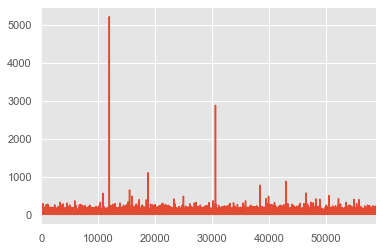

In [13]:
plt.style.use('ggplot') # using style convension of R languages ggplot library
imdb_ratings.length.plot()

Text(0.5, 1.0, 'Distribution of Flims by Runtime Minutes')

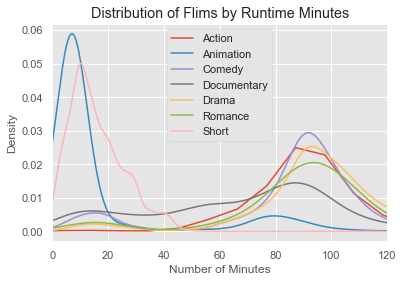

In [14]:
# density plot of fims by their genre
## kde = Kernel Density Estimate
plot_1 = imdb_ratings.groupby('genre').length.plot(kind='kde', xlim=(0, 120), legend='genre')
plot_1[0].set_xlabel('Number of Minutes')
plot_1[0].set_title('Distribution of Flims by Runtime Minutes')

# Insight: many animated fims are short around 20 minutes, while others categories average around 90 minutes in length

Text(0.5, 1.0, 'Distribution of ratings')

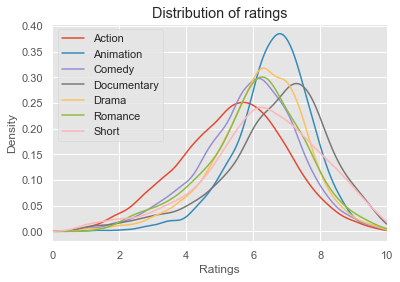

In [15]:
# distribution of ratings between genres
## kde = Kernel Density Estimate
plot_2 = imdb_ratings.groupby('genre').rating.plot(kind='kde', xlim=(0, 10), legend='genre')
plot_2[0].set_xlabel('Ratings')
plot_2[0].set_title('Distribution of ratings')

# Insight: documentaries have on average the highest rating, while action fims have the lowest

Text(0, 0.5, 'Rating')

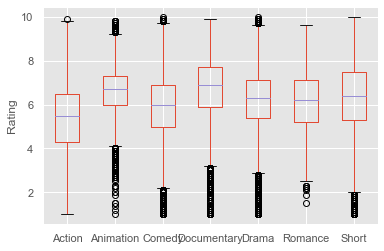

In [17]:
# distribution of ratings between genres using boxplot (same as before)
pd.pivot_table(imdb_ratings, values='rating', index='title', columns=['genre']).plot(kind='box', by='genre').set_ylabel('Rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002182CE721D0>,
      dtype=object)

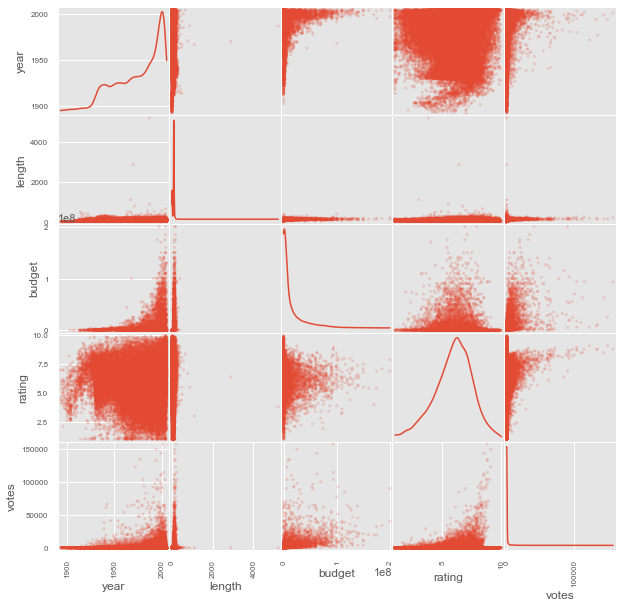

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(imdb_ratings[['year', 'length', 'budget', 'rating', 'votes']], alpha=0.2, figsize=(10,10), diagonal='kde')

# Insight: 
  ## higher budget fims have higher ratings
  ## fims made in the 1920s have higher average rating than those before

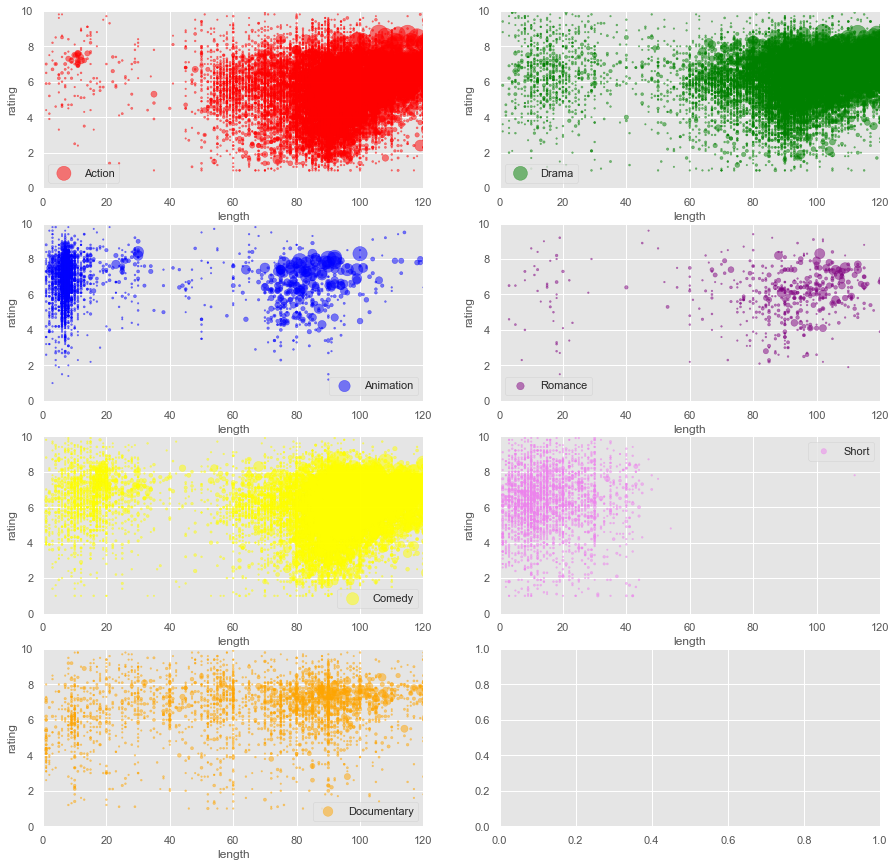

In [36]:
#  correlation between length and rating by genre 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
row = 0
col = 0
for index, genre in imdb_ratings.groupby('genre'):
    if row > 3:
        row = 0
        col += 1
    genre.groupby('genre').plot(ax=axes[row,col], kind='scatter', x='length', y='rating', s=np.sqrt(genre['votes']), 
                                c=genre['genre_color'], xlim=(0,120), ylim=(0,10), alpha=0.5, label=index)
    row += 1
    
# Insight:
    # scatterplots show the relationship between length and genre, with the size of the point giving sense of 
    # how much confience we should place in the value of the point